In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.quantum_info import  Statevector
from qiskit.visualization import plot_histogram

In [66]:
simulator = Aer.get_backend('qasm_simulator')
circ = QuantumCircuit(4, 4)
circ.h(1)
circ.h(2)

circ.cz(0,1)
circ.cz(1,2)
circ.cz(1,3)
circ.barrier(0)
circ.barrier(0)
circ.barrier()

circ.h(0)
circ.measure(0,0)
circ.h(0)
circ.h(1)
circ.measure(1,1)
circ.h(1)
circ.barrier()

circ.z(3).c_if(0, 1)

circ.x(2).c_if(1, 1)
circ.z(2).c_if(0, 1)

circ.barrier()

circ.measure(2,2)
circ.measure(3,3)


In [67]:
circ.draw()

░  ░  ░ ┌───┐┌─┐┌───┐      ░                 ░       
q_0: ──────■──░──░──░─┤ H ├┤M├┤ H ├──────░─────────────────░───────
     ┌───┐ │  ░  ░  ░ ├───┤└╥┘└┬─┬┘┌───┐ ░                 ░       
q_1: ┤ H ├─■──■──■──░─┤ H ├─╫──┤M├─┤ H ├─░─────────────────░───────
     ├───┤    │  │  ░ └───┘ ║  └╥┘ └───┘ ░      ┌───┐┌───┐ ░ ┌─┐   
q_2: ┤ H ├────■──┼──░───────╫───╫────────░──────┤ X ├┤ Z ├─░─┤M├───
     ├───┤       │  ░       ║   ║        ░ ┌───┐└─╥─┘└─╥─┘ ░ └╥┘┌─┐
q_3: ┤ X ├───────■──░───────╫───╫────────░─┤ Z ├──╫────╫───░──╫─┤M├
     └───┘          ░       ║   ║        ░ └─╥─┘  ║    ║   ░  ║ └╥┘
c_0: ═══════════════════════╩═══╬════════════■════╬════■══════╬══╬═
                                ║                 ║           ║  ║ 
c_1: ═══════════════════════════╩═════════════════■═══════════╬══╬═
                                                              ║  ║ 
c_2: ═════════════════════════════════════════════════════════╩══╬═
                                                                 ║ 
c_3: ════════════════════════════════════════════════════════════╩═

In [68]:
counts = execute(circ,simulator).result().get_counts() #使用指定的那个的模拟器运行电路，并获取运行结果，得到每种输入出现了几次(默认运行1024次)
print(counts)

{'1111': 254, '1100': 282, '1101': 252, '1110': 236}


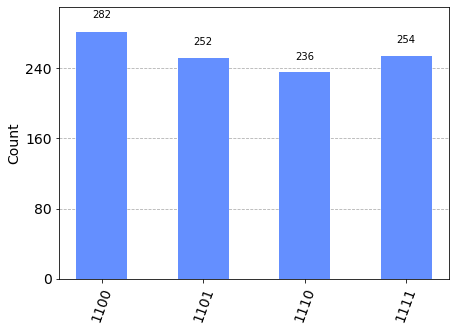

In [69]:
plot_histogram(counts)